# Clustering Algorithm In Machine Learning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

#### Import Dataset

In [5]:
df = pd.read_csv(r'C:\Users\yogap\OneDrive\Desktop\internship\day_1\hospital\New XLS Worksheet.csv')
df

,Patient_ID,Age,Gender,Blood_Type,Condition,Procedure,Cost,Outcome,Insurance_Type,number_of_Stay
0,1,45,Female,A+,Heart Disease,Angioplasty,15000,Recovered,NaN,5
1,2,60,Male,B+,Diabetes,Insulin Therapy,2000,Stable,Private,3
2,3,32,Female,O+,Fractured Arm,X-Ray and Splint,500,Recovered,NaN,1
3,4,75,Male,O-,Stroke,CT Scan and Medication,10000,Stable,NaN,7
4,5,50,Female,A-,Cancer,Surgery and Chemotherapy,25000,Recovered,Private,10
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Hypertension,Medication and Counseling,1000,Stable,NaN,70
980,997,45,Female,Appendicitis,Appendicitis,Appendectomy,8000,Recovered,Private,72
981,998,40,Male,Fractured Leg,Fractured Leg,Cast and Physical Therapy,3000,Recovered,NaN,72
982,999,78,Female,Heart Attack,Heart Attack,Cardiac Catheterization,18000,Stable,Private,74


In [6]:
#### Rename Columns
df.rename(columns={'Gender':'gender', 'City':'city','Condition':'condition','Insurance_Type':'insurance'}, inplace=True)

In [7]:
df

,Patient_ID,Age,gender,Blood_Type,condition,Procedure,Cost,Outcome,insurance,number_of_Stay
0,1,45,Female,A+,Heart Disease,Angioplasty,15000,Recovered,NaN,5
1,2,60,Male,B+,Diabetes,Insulin Therapy,2000,Stable,Private,3
2,3,32,Female,O+,Fractured Arm,X-Ray and Splint,500,Recovered,NaN,1
3,4,75,Male,O-,Stroke,CT Scan and Medication,10000,Stable,NaN,7
4,5,50,Female,A-,Cancer,Surgery and Chemotherapy,25000,Recovered,Private,10
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Hypertension,Medication and Counseling,1000,Stable,NaN,70
980,997,45,Female,Appendicitis,Appendicitis,Appendectomy,8000,Recovered,Private,72
981,998,40,Male,Fractured Leg,Fractured Leg,Cast and Physical Therapy,3000,Recovered,NaN,72
982,999,78,Female,Heart Attack,Heart Attack,Cardiac Catheterization,18000,Stable,Private,74


In [8]:
df.shape

(984, 10)

In [10]:
df.describe()

,Patient_ID,Age,Cost,number_of_Stay
count,984.000000,984.000000,984.000000,984.000000
mean,500.329268,53.754065,8367.479675,37.663618
std,288.979531,14.941135,7761.990976,19.595805
min,1.000000,25.000000,100.000000,1.000000
25%,250.750000,45.000000,1000.000000,21.000000
50%,500.500000,55.000000,6000.000000,38.000000
75%,750.250000,65.000000,15000.000000,54.250000
max,1000.000000,78.000000,25000.000000,76.000000


#### Checking Null Value

In [11]:
df.isnull().sum()

Patient_ID          0
Age                 0
gender              0
Blood_Type          1
condition           0
Procedure           0
Cost                0
Outcome             0
insurance         335
number_of_Stay      0
dtype: int64

In [12]:
df

,Patient_ID,Age,gender,Blood_Type,condition,Procedure,Cost,Outcome,insurance,number_of_Stay
0,1,45,Female,A+,Heart Disease,Angioplasty,15000,Recovered,NaN,5
1,2,60,Male,B+,Diabetes,Insulin Therapy,2000,Stable,Private,3
2,3,32,Female,O+,Fractured Arm,X-Ray and Splint,500,Recovered,NaN,1
3,4,75,Male,O-,Stroke,CT Scan and Medication,10000,Stable,NaN,7
4,5,50,Female,A-,Cancer,Surgery and Chemotherapy,25000,Recovered,Private,10
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Hypertension,Medication and Counseling,1000,Stable,NaN,70
980,997,45,Female,Appendicitis,Appendicitis,Appendectomy,8000,Recovered,Private,72
981,998,40,Male,Fractured Leg,Fractured Leg,Cast and Physical Therapy,3000,Recovered,NaN,72
982,999,78,Female,Heart Attack,Heart Attack,Cardiac Catheterization,18000,Stable,Private,74


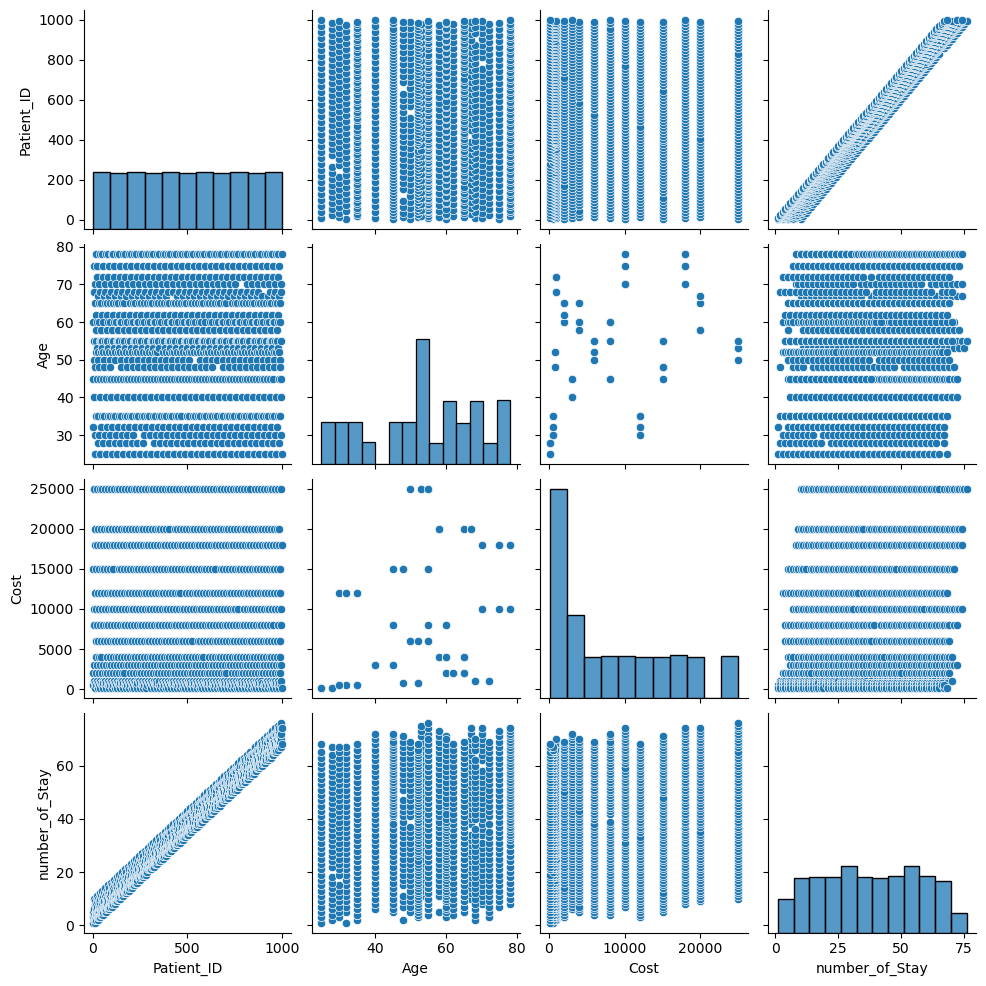

In [13]:
seaborn.pairplot(df)
plt.show()

In [14]:
seaborn.pairplot(df)
plt.show()

0      15000
1       2000
2        500
3      10000
4      25000
       ...  
979     1000
980     8000
981     3000
982    18000
983      100
Name: Cost, Length: 984, dtype: int64

In [1]:
import sklearn.cluster as cluster

In [15]:
kmeans = cluster.KMeans(n_clusters = 5) # k = 5

In [16]:
kmeans = cluster.KMeans(n_clusters = 5) # k = 5

In [17]:
kmeans.cluster_centers_

array([[  599.23954373,   501.40304183],
       [12321.42857143,   498.23469388],
       [20989.8989899 ,   499.86363636],
       [ 7007.63358779,   497.91603053],
       [ 2994.89795918,   503.06632653]])

In [18]:
df['clusters'] = kmeans.labels_

In [19]:
df['clusters']

0      1
1      4
2      0
3      1
4      2
      ..
979    0
980    3
981    4
982    2
983    0
Name: clusters, Length: 984, dtype: int32

In [20]:
df.head(15)

,Patient_ID,Age,gender,Blood_Type,condition,Procedure,Cost,Outcome,insurance,number_of_Stay,clusters
0,1,45,Female,A+,Heart Disease,Angioplasty,15000,Recovered,NaN,5,1
1,2,60,Male,B+,Diabetes,Insulin Therapy,2000,Stable,Private,3,4
2,3,32,Female,O+,Fractured Arm,X-Ray and Splint,500,Recovered,NaN,1,0
3,4,75,Male,O-,Stroke,CT Scan and Medication,10000,Stable,NaN,7,1
4,5,50,Female,A-,Cancer,Surgery and Chemotherapy,25000,Recovered,Private,10,2
5,6,68,Male,B-,Hypertension,Medication and Counseling,1000,Stable,Private,2,0
6,7,55,Female,AB+,Appendicitis,Appendectomy,8000,Recovered,NaN,4,3
7,8,40,Male,AB-,Fractured Leg,Cast and Physical Therapy,3000,Recovered,Public,6,4
8,9,70,Female,A+,Heart Attack,Cardiac Catheterization,18000,Stable,NaN,8,2
9,10,25,Male,B+,Allergic Reaction,Epinephrine Injection,100,Recovered,NaN,1,0


In [21]:
df['clusters'].value_counts()

clusters
0    263
2    198
1    196
4    196
3    131
Name: count, dtype: int64

In [22]:
seaborn.scatterplot(x ='gender', y='Blood_Type', hue='clusters', data=df)

<Axes: xlabel='gender', ylabel='Blood_Type'>

In [23]:
from sklearn.cluster import KMeans

In [25]:
K_range = range(1,15)
wcss = []

In [26]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Patient_ID','Cost']])
    wcss.append(km.inertia_)  #Inertia_ is the sum of squared error for each cluster.

In [27]:
wcss

[59306368862.91058,
 13926761454.574314,
 5667665880.910976,
 3011490799.207719,
 2366951901.0487056,
 1413308413.5914247,
 635352589.3677452,
 505365448.0046957,
 405378143.1794213,
 247395728.450312,
 145131199.07001966,
 141092486.31749448,
 95977473.86099844,
 91816945.524699]

In [28]:
plt.xlabel('Number of clusters (K)') 
plt.ylabel('Sum of squared error') 
plt.plot(K_range,wcss) 
plt.title('Tennis Elbow Courve') 

Text(0.5, 1.0, 'Tennis Elbow Courve')

In [29]:
K_range = range(1,20)
wcss2 = []

In [30]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Patient_ID']])
    wcss2.append(km.inertia_)

In [31]:
wcss2

[82089513.31707317,
 20526167.74607899,
 9122398.376531566,
 5140753.037030965,
 3291268.4782999125,
 2295276.6164837303,
 1678058.832838939,
 1295188.1650441224,
 1033481.5771475821,
 829793.4173994099,
 686159.0275854648,
 615130.5689609376,
 501893.0328539503,
 426242.51546528935,
 367633.3874452779,
 351031.2059166458,
 285146.1203667915,
 255184.44045655665,
 236690.6463140496]

In [32]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss2)

In [ ]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss2)

In [ ]:
kmeans2 = kmeans2.fit(df[['Patient_ID']])

In [ ]:
kmeans2.cluster_centers_

In [ ]:
df['age_clusters'] = kmeans2.labels_

In [ ]:
df['age_clusters'].value_counts()

In [ ]:
seaborn.scatterplot(x='Age', y='Cost',hue='age_clusters',data=df)